In [74]:
import pandas as pd
import numpy as np
from pymatgen.core import Composition
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.core.pylabtools import figsize
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['Arial'],
    "font.size": 24,
    'axes.unicode_minus': False 
}
plt.rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False  
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (8, 6),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 400
plt.rcParams['axes.grid'] = False

In [ ]:
small_dataset = pd.read_csv('/data/single_perovskite_oxide.csv')
small_dataset = small_dataset.drop(columns = 'Unnamed: 0').reset_index(drop=True)
small_dataset = small_dataset.drop(columns = 'composition').reset_index(drop=True)
small_dataset['composition'] = small_dataset['formula'].map(Composition)
small_dataset

,formula,target,A,B,composition
0,SmCrO3,1.736200,Sm,Cr,"(Sm, Cr, O)"
1,ScCoO3,0.786000,Sc,Co,"(Sc, Co, O)"
2,GdCrO3,0.825000,Gd,Cr,"(Gd, Cr, O)"
3,YCrO3,1.767900,Y,Cr,"(Y, Cr, O)"
4,LaFeO3,0.848400,La,Fe,"(La, Fe, O)"
5,SmCoO3,0.803900,Sm,Co,"(Sm, Co, O)"
6,YFeO3,0.637300,Y,Fe,"(Y, Fe, O)"
7,LaCrO3,1.903900,La,Cr,"(La, Cr, O)"
8,PrCrO3,1.847000,Pr,Cr,"(Pr, Cr, O)"
9,NdCrO3,1.904000,Nd,Cr,"(Nd, Cr, O)"


In [ ]:
df = pd.read_csv('/data/mag_regression_df.csv')
df

,formula,A1_x,A1_ratio_x,nA1_x,A2_x,A2_ratio_x,nA2_x,B1_x,B1_ratio_x,B2_x,...,avg ionic char,is_metal_oxide,spacegroup,hse_fold0,hse_fold1,hse_fold2,hse_fold3,hse_fold4,mean_hse,mean
0,Sm0.2Sc0.8Cr1O3,Sm,0.2,3,Sc,0.8,3,Cr,1.0,Cr,...,0.147721,1,221,2.168309,2.276464,2.005072,2.046627,2.233654,2.146025,2.226143
1,Sm0.2Sc0.8Fe1O3,Sm,0.2,3,Sc,0.8,3,Fe,1.0,Fe,...,0.140666,1,221,1.609860,1.370324,1.160970,1.492116,1.240138,1.374682,1.257144
2,Sm0.2Zr1Sc0.8O3,Sm,0.2,3,Sc,0.8,3,Zr,1.0,Zr,...,0.161521,1,221,4.711727,3.665366,4.297602,4.961226,3.249203,4.177025,4.656852
3,Sm0.2Sc0.8Ge1O3,Sm,0.2,3,Sc,0.8,3,Ge,1.0,Ge,...,0.133420,1,221,5.052641,0.000000,4.953676,5.041002,4.658926,3.941249,4.926561
4,Sm0.2Hf1Sc0.8O3,Sm,0.2,3,Sc,0.8,3,Hf,1.0,Hf,...,0.162762,1,221,4.560859,3.350132,4.993268,4.880020,4.864652,4.529786,4.824700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35320,Sr1Ce0.7Zr0.3O3,Sr,1.0,2,Sr,0.0,2,Ce,0.7,Zr,...,0.181550,1,221,3.981097,3.791323,3.856931,3.800434,3.789541,3.843865,3.809557
35321,Sr1Ce0.7Be0.3O3,Sr,1.0,2,Sr,0.0,2,Ce,0.7,Be,...,0.179356,1,221,4.043654,3.503706,3.754892,3.586819,2.266009,3.431016,3.722268
35322,Sr1Ce0.7Ge0.3O3,Sr,1.0,2,Sr,0.0,2,Ce,0.7,Ge,...,0.175717,1,221,1.878613,0.000000,3.617023,2.542185,2.391829,2.085930,2.607413
35323,Sr1Ce0.7Hf0.3O3,Sr,1.0,2,Sr,0.0,2,Ce,0.7,Hf,...,0.181833,1,221,3.418533,3.601285,3.642664,3.785248,3.784931,3.646532,3.703532


In [9]:
eg = df['mean_hse']

In [10]:
data_0_1 = [x for x in eg if 0<x<1]
data_1_2 = [x for x in eg if 1<=x<2]
data_2_3 = [x for x in eg if 2<=x<3]
data_3_4 = [x for x in eg if 3<=x<4]
data_4_5 = [x for x in eg if 4<=x<5]
data_5_6 = [x for x in eg if 5<=x<6]
data_6_7 = [x for x in eg if 6<=x<7]
sum_0_1 = len(data_0_1)
sum_1_2 = len(data_1_2)
sum_2_3 = len(data_2_3)
sum_3_4 = len(data_3_4)
sum_4_5 = len(data_4_5)
sum_5_6 = len(data_5_6)
sum_6_7 = len(data_6_7)
data = {'(0,1)': sum_0_1, '[1,2)': sum_1_2, '(2,3]': sum_2_3, '(3,4]': sum_3_4,'(4,5]':sum_4_5,'(5,6]':sum_5_6,'(6,7]':sum_6_7}
names = list(data.keys())
values = list(data.values())

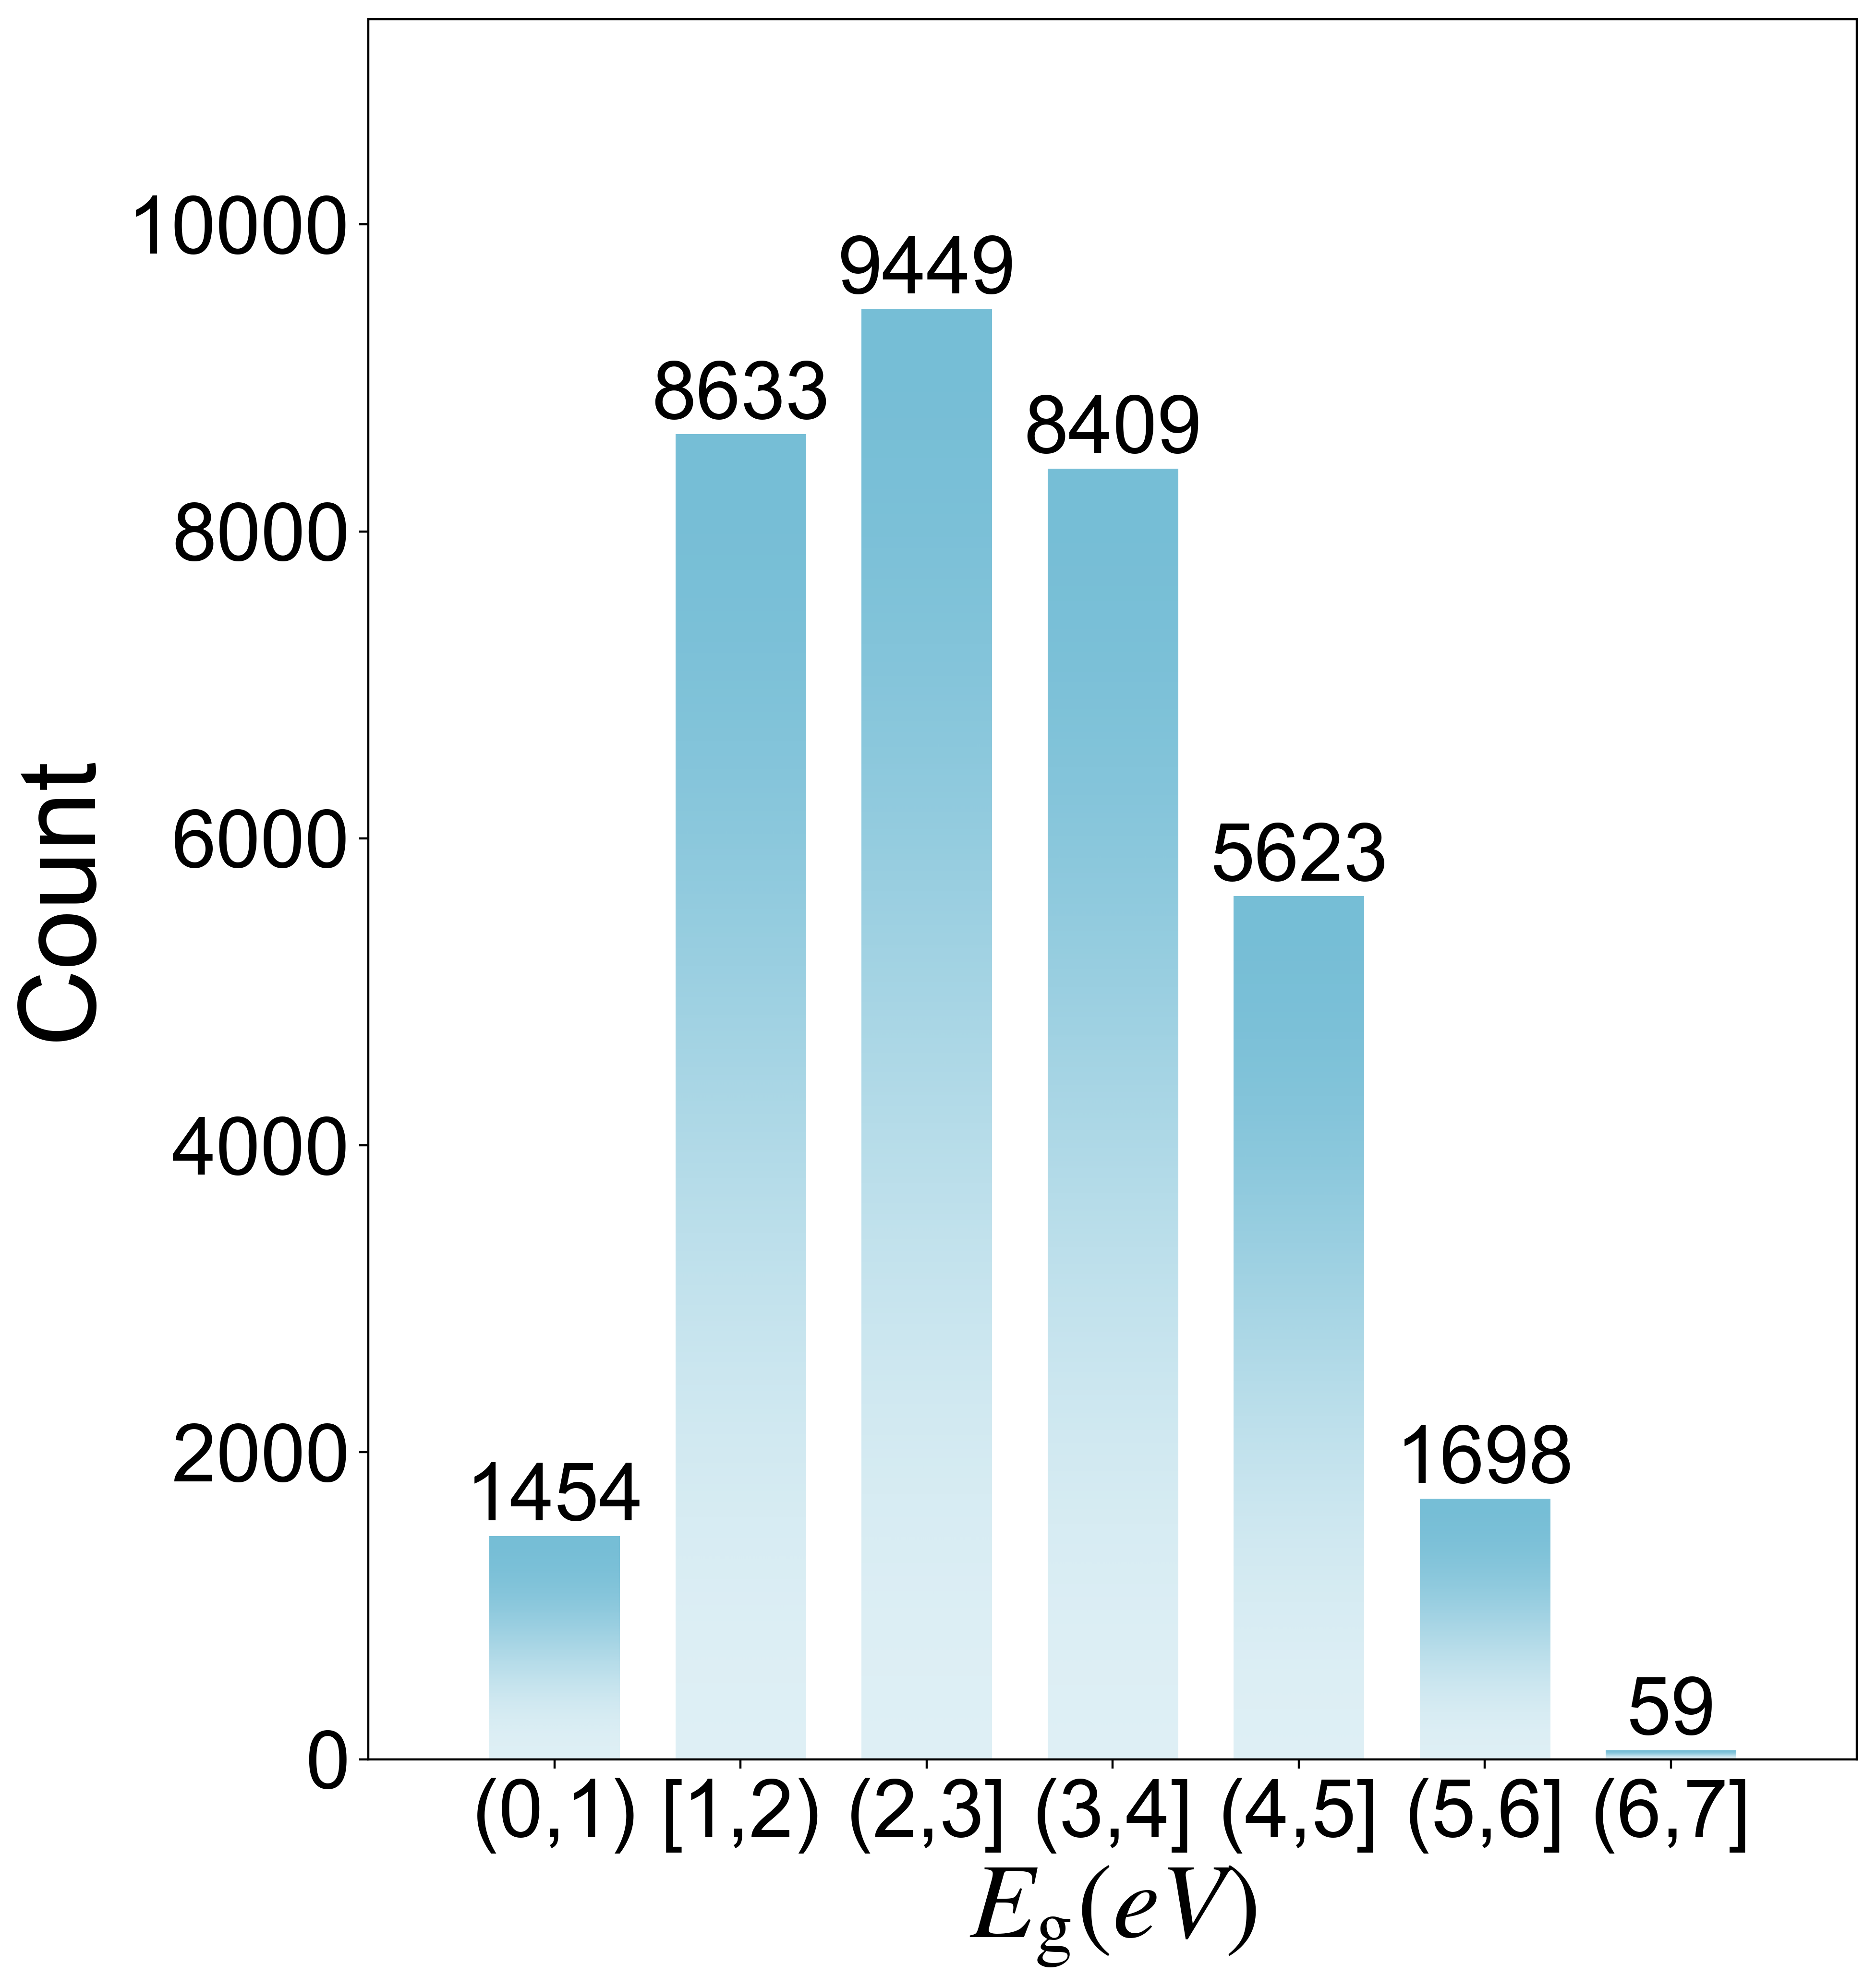

In [ ]:
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
 
# mpl.rcParams["font.sans-serif"] = ["Microsoft YaHei"]
# mpl.rcParams['axes.unicode_minus'] = False
 
warnings.filterwarnings('ignore')

 
def gradient_image(ax, extent, direction=0, cmap_range=(0, 0.5), **kwargs):
    phi = direction * np.pi / 2   
    v = np.array([np.cos(phi), np.sin(phi)])  
    X = np.array([[v @ [0, 0], v @ [0, 0]],
                  [v @ [1, 1], v @ [1, 1]]])  
    a, b = cmap_range  
    X = a + (b - a) / X.max() * X  
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, aspect='auto', **kwargs)
    return im
 
def gradient_bar(ax, x, y, width=0.7, bottom=0):
    for left, top in zip(x, y):  
        left = left - width/2
        right = left + width
   
        colors = [(114 / 255, 188 / 255, 213 / 255), (1, 1, 1)]
        cmap = LinearSegmentedColormap.from_list('my_camp', colors, N=256)
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=cmap, cmap_range=(0, 0.8))
  
    
def matplot(data,values):
    xticks = data[0]
    x = range(1, len(xticks)+1)
    y = data[1]
    xlabel = data[2]
    ylabel = data[3]
    title = data[-1]
    ylim_max = max(y) * 6 / 5
 
    fig = plt.figure(figsize=(10, 12))
    ax = fig.add_subplot(111)
 

    for x0, y0 in zip(x, y):
        plt.text(x0, y0, '%s' % int(y0),
                 ha='center',
                 va='bottom',
                 size=30,
                 family="Arial")
    xmin, xmax = 0, len(xticks)+1
    ymin, ymax = 0, ylim_max
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), autoscale_on=False)
    ax.set_ylabel(ylabel,fontsize=40)
    ax.set_xlabel(xlabel,fontsize=40)
    plt.xticks(x, xticks,fontsize=30)
    plt.yticks(fontsize=30)
    gradient_bar(ax=ax, x=x, y=y)
    
    plt.savefig('虚拟样本数据集分布.png',dpi=400, bbox_inches='tight')
    plt.show()

data = [names, values, '$E_{\mathrm{g}}(eV)$',
        'Count ', 'Large-shot']
 
matplot(data,values)

In [10]:
# df.to_csv('check_data_new.csv')

In [28]:
from scipy.stats import spearmanr
def remove_collinear_features(x, y,threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''  
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
#                 print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                x1 = x[col.values[0]]
                x2 = x[row.values[0]]
                corr1,p1 = spearmanr(x1, y)
                corr2,p2 = spearmanr(x2, y)
                if np.abs(corr1) < np.abs(corr2):
                    drop_cols.append(col.values[0])
                else:
                    drop_cols.append(row.values[0])
    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    return x

In [29]:
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers import composition as cf
from pymatgen.core import Composition
feature_calculators = MultipleFeaturizer([cf.ElementProperty.from_preset("magpie"),
                                          cf.ValenceOrbital(props=['avg']), cf.IonProperty(fast=True)])
feature_labels = feature_calculators.feature_labels()
X = df[feature_labels]
y = df['mean_hse']
X = remove_collinear_features(X,y,0.8)
dop_magpie_features_labels = X.columns
X = df[dop_magpie_features_labels]
X

,MagpieData mode Number,MagpieData maximum MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,...,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,avg d valence electrons,avg f valence electrons,compound possible
0,8.0,87.0,87.0,15.9994,54.8,2180.0,2125.2,812.920,909.7440,54.8,...,0.0,12.0,229.0,217.0,90.68,94.416,12.0,1.16,0.24,True
1,8.0,87.0,87.0,15.9994,54.8,1814.0,1759.2,739.120,821.1840,54.8,...,0.0,12.0,229.0,217.0,90.68,94.416,12.0,1.36,0.24,True
2,8.0,87.0,87.0,15.9994,54.8,2128.0,2073.2,802.520,897.2640,54.8,...,0.0,12.0,194.0,182.0,83.68,86.016,12.0,0.56,0.24,False
3,8.0,87.0,87.0,15.9994,54.8,1814.0,1759.2,619.200,677.2800,54.8,...,0.0,12.0,225.0,213.0,89.88,93.456,12.0,2.16,0.24,False
4,8.0,87.0,87.0,15.9994,54.8,2506.0,2451.2,878.120,987.9840,54.8,...,0.0,12.0,194.0,182.0,83.68,86.016,12.0,0.56,3.04,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35320,8.0,87.0,87.0,15.9994,54.8,2128.0,2073.2,520.500,558.8400,54.8,...,0.0,12.0,225.0,213.0,91.00,94.800,12.0,0.26,0.14,True
35321,8.0,87.0,87.0,15.9994,54.8,1560.0,1505.2,486.420,517.9440,54.8,...,0.0,12.0,225.0,213.0,91.00,94.800,12.0,0.14,0.14,False
35322,8.0,87.0,87.0,15.9994,54.8,1211.4,1156.6,465.504,492.8448,54.8,...,0.0,12.0,225.0,213.0,92.86,97.032,12.0,0.74,0.14,True
35323,8.0,87.0,87.0,15.9994,54.8,2506.0,2451.2,543.180,586.0560,54.8,...,0.0,12.0,225.0,213.0,91.00,94.800,12.0,0.26,0.98,True


In [30]:
select_columns = X.columns

In [31]:
train_df = pd.read_csv('train_df.csv').drop(columns = 'Unnamed: 0')
test_df = pd.read_csv('test_df.csv').drop(columns = 'Unnamed: 0')
X_train = train_df[select_columns]
y_train = train_df['Eg']
X_test = test_df[select_columns]
y_test = test_df['Eg']
X_test

,MagpieData mode Number,MagpieData maximum MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,...,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,avg d valence electrons,avg f valence electrons,compound possible
0,8.0,87.0,87.0,15.9994,54.8,1814.0,1759.2,739.120,821.1840,54.8,...,0.0,12.0,229.0,217.0,90.68,94.416,12.0,1.36,0.24,True
1,8.0,87.0,87.0,15.9994,54.8,1811.0,1756.2,702.640,777.4080,54.8,...,0.0,12.0,229.0,217.0,90.68,94.416,12.0,1.36,1.36,True
2,8.0,87.0,87.0,15.9994,54.8,1811.0,1756.2,736.720,818.3040,54.8,...,0.0,12.0,229.0,217.0,90.68,94.416,12.0,1.36,0.24,True
3,8.0,87.0,87.0,15.9994,54.8,1811.0,1756.2,639.760,701.9520,54.8,...,0.0,12.0,229.0,217.0,90.68,94.416,12.0,1.36,0.24,True
4,8.0,87.0,87.0,15.9994,54.8,1345.0,1290.2,363.510,370.4520,54.8,...,0.0,12.0,194.0,182.0,72.68,72.816,12.0,2.16,0.24,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7060,8.0,87.0,87.0,15.9994,54.8,2128.0,2073.2,613.484,670.4208,54.8,...,0.0,12.0,225.0,213.0,92.86,97.032,12.0,0.88,0.00,True
7061,8.0,87.0,87.0,15.9994,54.8,2506.0,2451.2,691.160,763.6320,54.8,...,0.0,12.0,225.0,213.0,91.00,94.800,12.0,0.40,0.84,True
7062,8.0,87.0,87.0,15.9994,54.8,2506.0,2451.2,657.980,723.8160,54.8,...,0.0,12.0,225.0,213.0,91.00,94.800,12.0,0.34,2.02,True
7063,8.0,87.0,87.0,15.9994,54.8,1941.0,1886.2,620.820,679.2240,54.8,...,0.0,12.0,225.0,213.0,91.00,94.800,12.0,0.28,0.72,False


In [32]:
dop_magpie_etr = ExtraTreesRegressor(n_jobs = -1 ,random_state=42)
dop_magpie_etr.fit(X_train, y_train)
y_pred = dop_magpie_etr.predict(X_test)
print('Performance on the test set: MAE = %0.4f' % mean_absolute_error(y_test,y_pred))
print('Performance on the test set: RMSE = %0.4f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Performance on the test set: R2 SCORE = %0.4f' % r2_score(y_test,y_pred))

Performance on the test set: MAE = 0.3199
Performance on the test set: RMSE = 0.4414
Performance on the test set: R2 SCORE = 0.8719


In [27]:
from sklearn.ensemble import ExtraTreesRegressor
dop_magpie_etr = ExtraTreesRegressor(n_jobs=-1, random_state=42)
dop_magpie_etr.fit(X_train, y_train)
feature_importance=pd.DataFrame()
feature_importance['features'] = X.columns
feature_importance['feature_importances'] = dop_magpie_etr.feature_importances_
threshold = np.sort(feature_importance['feature_importances'].values)
score = []
n_features = []
cols = []
for i in tqdm(threshold):
    selector = SelectFromModel(dop_magpie_etr,threshold=i)
    X_embedded = selector.fit_transform(X_train, y_train)
    once = cross_val_score(dop_magpie_etr,X_embedded,y_train,cv=5,scoring="r2",n_jobs=-1).mean()#交叉验证
    score.append(once)
    n_features.append(X_embedded.shape[1])
    cols.append(X.columns[selector.get_support()])
result = pd.DataFrame({"col":cols,"score":score,"n_features":n_features})
result

100%|██████████| 81/81 [04:21<00:00,  3.22s/it]


,col,score,n_features
0,"Index(['MagpieData mode Number', 'MagpieData m...",0.767022,81
1,"Index(['MagpieData mode Number', 'MagpieData m...",0.767022,81
2,"Index(['MagpieData mode Number', 'MagpieData m...",0.767022,81
3,"Index(['MagpieData mode Number', 'MagpieData m...",0.767022,81
4,"Index(['MagpieData mode Number', 'MagpieData m...",0.767022,81
...,...,...,...
76,"Index(['MagpieData avg_dev NsUnfilled', 'Magpi...",0.427800,5
77,"Index(['MagpieData maximum NUnfilled', 'Magpie...",0.309286,4
78,"Index(['MagpieData maximum NUnfilled', 'Magpie...",0.266523,3
79,"Index(['MagpieData maximum NUnfilled', 'Magpie...",0.265137,2


In [18]:
features_select = result.sort_values(by='score',ascending=True)
features_select = features_select[features_select['score']>=0.85]

In [19]:
optimize_feature_labels = features_select.iloc[0]['col']
X_train = X.loc[X_train.index][optimize_feature_labels]
X_test = X.loc[X_test.index][optimize_feature_labels]
if 'O' in X_train.columns:
    X_train = X_train.drop(columns='O')
    X_test = X_test.drop(columns='O')
X_train.shape, X_test.shape

((28260, 25), (7065, 25))

In [20]:
X_train.columns

Index(['MagpieData avg_dev MeltingT', 'MagpieData range Column',
       'MagpieData mean Row', 'MagpieData avg_dev Row',
       'MagpieData avg_dev NpValence', 'MagpieData maximum NdValence',
       'MagpieData range NdValence', 'MagpieData minimum NValence',
       'MagpieData mean NValence', 'MagpieData avg_dev NsUnfilled',
       'MagpieData range NpUnfilled', 'MagpieData mean NpUnfilled',
       'MagpieData avg_dev NpUnfilled', 'MagpieData mean NdUnfilled',
       'MagpieData avg_dev NdUnfilled', 'MagpieData maximum NUnfilled',
       'MagpieData mean GSvolume_pa', 'MagpieData avg_dev GSvolume_pa',
       'MagpieData mean GSmagmom', 'MagpieData avg_dev GSmagmom',
       'MagpieData maximum SpaceGroupNumber',
       'MagpieData mean SpaceGroupNumber',
       'MagpieData avg_dev SpaceGroupNumber', 'avg d valence electrons',
       'compound possible'],
      dtype='object')

# 验证集

In [21]:
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers import composition as cf
from pymatgen.core import Composition
feature_calculators = MultipleFeaturizer([cf.ElementProperty.from_preset("magpie"),
                                          cf.ValenceOrbital(props=['avg']), cf.IonProperty(fast=True)])
feature_labels = feature_calculators.feature_labels()
small_dataset_features = feature_calculators.featurize_dataframe(small_dataset,col_id='composition')
small_dataset_features

MultipleFeaturizer:   0%|          | 0/52 [00:00<?, ?it/s]

,formula,target,A,B,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,...,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,compound possible,max ionic char,avg ionic char
0,SmCrO3,1.736200,Sm,Cr,"(Sm, Cr, O)",8.0,62.0,54.0,22.0,16.80,...,86.2,89.04,12.0,1.8,2.4,1.0,1.2,True,0.724240,0.154892
1,ScCoO3,0.786000,Sc,Co,"(Sc, Co, O)",8.0,27.0,19.0,14.4,7.68,...,84.8,87.36,12.0,2.0,2.4,1.6,0.0,True,0.660947,0.136622
2,GdCrO3,0.825000,Gd,Cr,"(Gd, Cr, O)",8.0,64.0,56.0,22.4,17.28,...,91.8,95.76,12.0,1.8,2.4,1.2,1.4,True,0.714753,0.153484
3,YCrO3,1.767900,Y,Cr,"(Y, Cr, O)",8.0,39.0,31.0,17.4,11.28,...,91.8,95.76,12.0,1.8,2.4,1.2,0.0,True,0.708321,0.152541
4,LaFeO3,0.848400,La,Fe,"(La, Fe, O)",8.0,57.0,49.0,21.4,16.08,...,91.8,95.76,12.0,2.0,2.4,1.4,0.0,True,0.745613,0.151694
5,SmCoO3,0.803900,Sm,Co,"(Sm, Co, O)",8.0,62.0,54.0,22.6,17.52,...,79.2,80.64,12.0,2.0,2.4,1.4,1.2,True,0.724240,0.146339
6,YFeO3,0.637300,Y,Fe,"(Y, Fe, O)",8.0,39.0,31.0,17.8,11.76,...,91.8,95.76,12.0,2.0,2.4,1.4,0.0,True,0.708321,0.145782
7,LaCrO3,1.903900,La,Cr,"(La, Cr, O)",8.0,57.0,49.0,21.0,15.60,...,91.8,95.76,12.0,1.8,2.4,1.2,0.0,True,0.745613,0.158143
8,PrCrO3,1.847000,Pr,Cr,"(Pr, Cr, O)",8.0,59.0,51.0,21.4,16.08,...,91.8,95.76,12.0,1.8,2.4,1.0,0.6,True,0.736585,0.156756
9,NdCrO3,1.904000,Nd,Cr,"(Nd, Cr, O)",8.0,60.0,52.0,21.6,16.32,...,91.8,95.76,12.0,1.8,2.4,1.0,0.8,True,0.733532,0.156291


In [22]:
global X
def generate_label_delete_result(feature_labels,model,X_train, X_test, y_train, y_test):
    candidates = []
    f_labels = feature_labels
    for label in feature_labels:
        if len(f_labels) >= 2:
            f_labels = f_labels.drop(label)
            X_train = X.loc[X_train.index][f_labels]
            X_test = X.loc[X_test.index][f_labels]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mae = mean_absolute_error(y_test,y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test,y_pred)
            tmp_dict = {'delete_label':label,'MAE':mae,
                       'RMSE':rmse,'R2':r2}
            candidates.append(tmp_dict)
    return candidates

In [31]:
delete_result = generate_label_delete_result(optimize_feature_labels,dop_magpie_etr,X_train, X_test, y_train, y_test)
delete_result = pd.DataFrame(delete_result)
delete_result

,delete_label,MAE,RMSE,R2
0,MagpieData avg_dev MeltingT,0.326261,0.452671,0.866360
1,MagpieData range Column,0.329536,0.455336,0.864782
2,MagpieData mean Row,0.329265,0.455184,0.864872
3,MagpieData avg_dev Row,0.332804,0.460798,0.861518
4,MagpieData avg_dev NpValence,0.333465,0.461384,0.861165
5,MagpieData maximum NdValence,0.335194,0.463921,0.859635
6,MagpieData range NdValence,0.336481,0.464222,0.859453
7,MagpieData minimum NValence,0.345200,0.474190,0.853352
8,MagpieData mean NValence,0.365656,0.505712,0.833207
9,MagpieData avg_dev NsUnfilled,0.373939,0.521270,0.822786


In [23]:
dop_magpie_etr = ExtraTreesRegressor(n_jobs = -1, random_state=42)
dop_magpie_etr.fit(X_train, y_train)
y_pred = dop_magpie_etr.predict(X_test)
print('Performance on the test set: MAE = %0.4f' % mean_absolute_error(y_test,y_pred))
print('Performance on the test set: RMSE = %0.4f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Performance on the test set: R2 SCORE = %0.4f' % r2_score(y_test,y_pred))

Performance on the test set: MAE = 0.3258
Performance on the test set: RMSE = 0.4502
Performance on the test set: R2 SCORE = 0.8678


In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tqdm import tqdm
train_model = ExtraTreesRegressor(n_jobs = -1, random_state = 42)
y_eg_abo3 = small_dataset_features['target']
error1 = []
error2 = []
r2_prm = []
error1_base=[]
error2_base=[]
r2_prl=[]
train_set = []
test_set = []
tmp_df = pd.DataFrame()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_indices = kf.split(X,y)
base_features = small_dataset_features[optimize_feature_labels]
for i,(train_index, test_index) in enumerate(cv_indices):
    train_set.append(train_index)
    test_set.append(test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    X_train = X_train[optimize_feature_labels]
    X_test = X_test[optimize_feature_labels]
    name = f"fold_{i}"
    train_model.fit(X_train, y_train)
    y_pred =  train_model.predict(X_test)
    mae_model = mean_absolute_error(y_test, y_pred)
    rmse_model = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_model = r2_score(y_test,y_pred)
    error1.append(mae_model)
    error2.append(rmse_model)
    r2_prm.append(r2_model)
    
    y_base = train_model.predict(base_features)
    tmp_df[f'column_{i}'] = y_base
    MAE_BASE = mean_absolute_error(y_base,y_eg_abo3)
    RMSE_BASE = np.sqrt(mean_squared_error(y_base,y_eg_abo3))
    R2_BASE = r2_score(y_base,y_eg_abo3)
    error1_base.append(MAE_BASE)
    error2_base.append(RMSE_BASE)
    r2_prl.append(R2_BASE)
    print(name)
    print(f"Performance on the test set: MAE = %0.4f,RMSE = %0.4f, R2 = %0.4f" % (mae_model, rmse_model, r2_model))
    print(f"Performance on the small set: MAE = %0.4f,RMSE = %0.4f, R2 = %0.4f" % (MAE_BASE, RMSE_BASE, R2_BASE))
mean_error1 = sum(error1) / len(error1)
mean_error2 = sum(error2) / len(error2)
mean_r2 = sum(r2_prm) / len(r2_prm)
print('Performance on the test set using 5-fold: MAE = %0.4f' % mean_error1)
print('Performance on the test set using 5-fold: RMSE = %0.4f' % mean_error2)
print('Performance on the test set using 5-fold: R2 = %0.4f' % mean_r2)

mean_error1_base = sum(error1_base) / len(error1_base)
mean_error2_base = sum(error2_base) / len(error2_base)
mean_r2_base = sum(r2_prl) / len(r2_prl)
print('Performance on the valid set using 5-fold: MAE = %0.4f' % mean_error1_base)
print('Performance on the valid set using 5-fold: RMSE = %0.4f' % mean_error2_base)
print('Performance on the valid set using 5-fold: R2 = %0.4f' % mean_r2_base)

fold_0
Performance on the test set: MAE = 0.3245,RMSE = 0.4481, R2 = 0.8691
Performance on the small set: MAE = 0.4747,RMSE = 0.6326, R2 = 0.5721
fold_1
Performance on the test set: MAE = 0.3399,RMSE = 0.4707, R2 = 0.8545
Performance on the small set: MAE = 0.4539,RMSE = 0.6024, R2 = 0.6043
fold_2
Performance on the test set: MAE = 0.3385,RMSE = 0.4664, R2 = 0.8619
Performance on the small set: MAE = 0.4494,RMSE = 0.6258, R2 = 0.5876
fold_3
Performance on the test set: MAE = 0.3268,RMSE = 0.4517, R2 = 0.8652
Performance on the small set: MAE = 0.4620,RMSE = 0.6246, R2 = 0.5903
fold_4
Performance on the test set: MAE = 0.3291,RMSE = 0.4552, R2 = 0.8638
Performance on the small set: MAE = 0.4598,RMSE = 0.6107, R2 = 0.6099
Performance on the test set using 5-fold: MAE = 0.3318
Performance on the test set using 5-fold: RMSE = 0.4584
Performance on the test set using 5-fold: R2 = 0.8629
Performance on the valid set using 5-fold: MAE = 0.4600
Performance on the valid set using 5-fold: RMSE =

In [25]:
best_train_index = train_set[4]
best_test_index = test_set[4]
best_X_train = X.loc[best_train_index].reset_index(drop=True)
best_X_test = X.loc[best_test_index].reset_index(drop=True)
best_y_train = y.loc[best_train_index].reset_index(drop=True)
best_y_test = y.loc[best_test_index].reset_index(drop=True)

In [26]:
best_X_train = best_X_train[optimize_feature_labels]
best_X_test = best_X_test[optimize_feature_labels]

In [27]:
model_best = ExtraTreesRegressor(n_jobs=-1, random_state=42)
model_best.fit(best_X_train, best_y_train)
y_pred = model_best.predict(best_X_test)
MAE_4 = mean_absolute_error(best_y_test,y_pred)
RMSE_4 = np.sqrt(mean_squared_error(best_y_test, y_pred))
R2_4 = r2_score(best_y_test,y_pred)
print('Performance on the test set: MAE = %0.4f' % MAE_4)
print('Performance on the test set: RMSE = %0.4f' % RMSE_4)
print('Performance on the test set: R2 SCORE = %0.4f' % R2_4)

Performance on the test set: MAE = 0.3291
Performance on the test set: RMSE = 0.4552
Performance on the test set: R2 SCORE = 0.8638


In [30]:
# best_f = optimize_feature_labels.tolist()

In [31]:
# import json
# with open("best_feature_m.json", "w") as f:
#     json.dump(best_f, f)

In [30]:
import pickle
with open('model_m.pkl', 'wb') as f:
    pickle.dump(model_best, f)

In [33]:
origion_error = abs(y_test-y_pred).tolist()
origion_error = pd.DataFrame(origion_error, columns=['big_1'])
origion_error.to_csv('mgpie_big_1.csv')

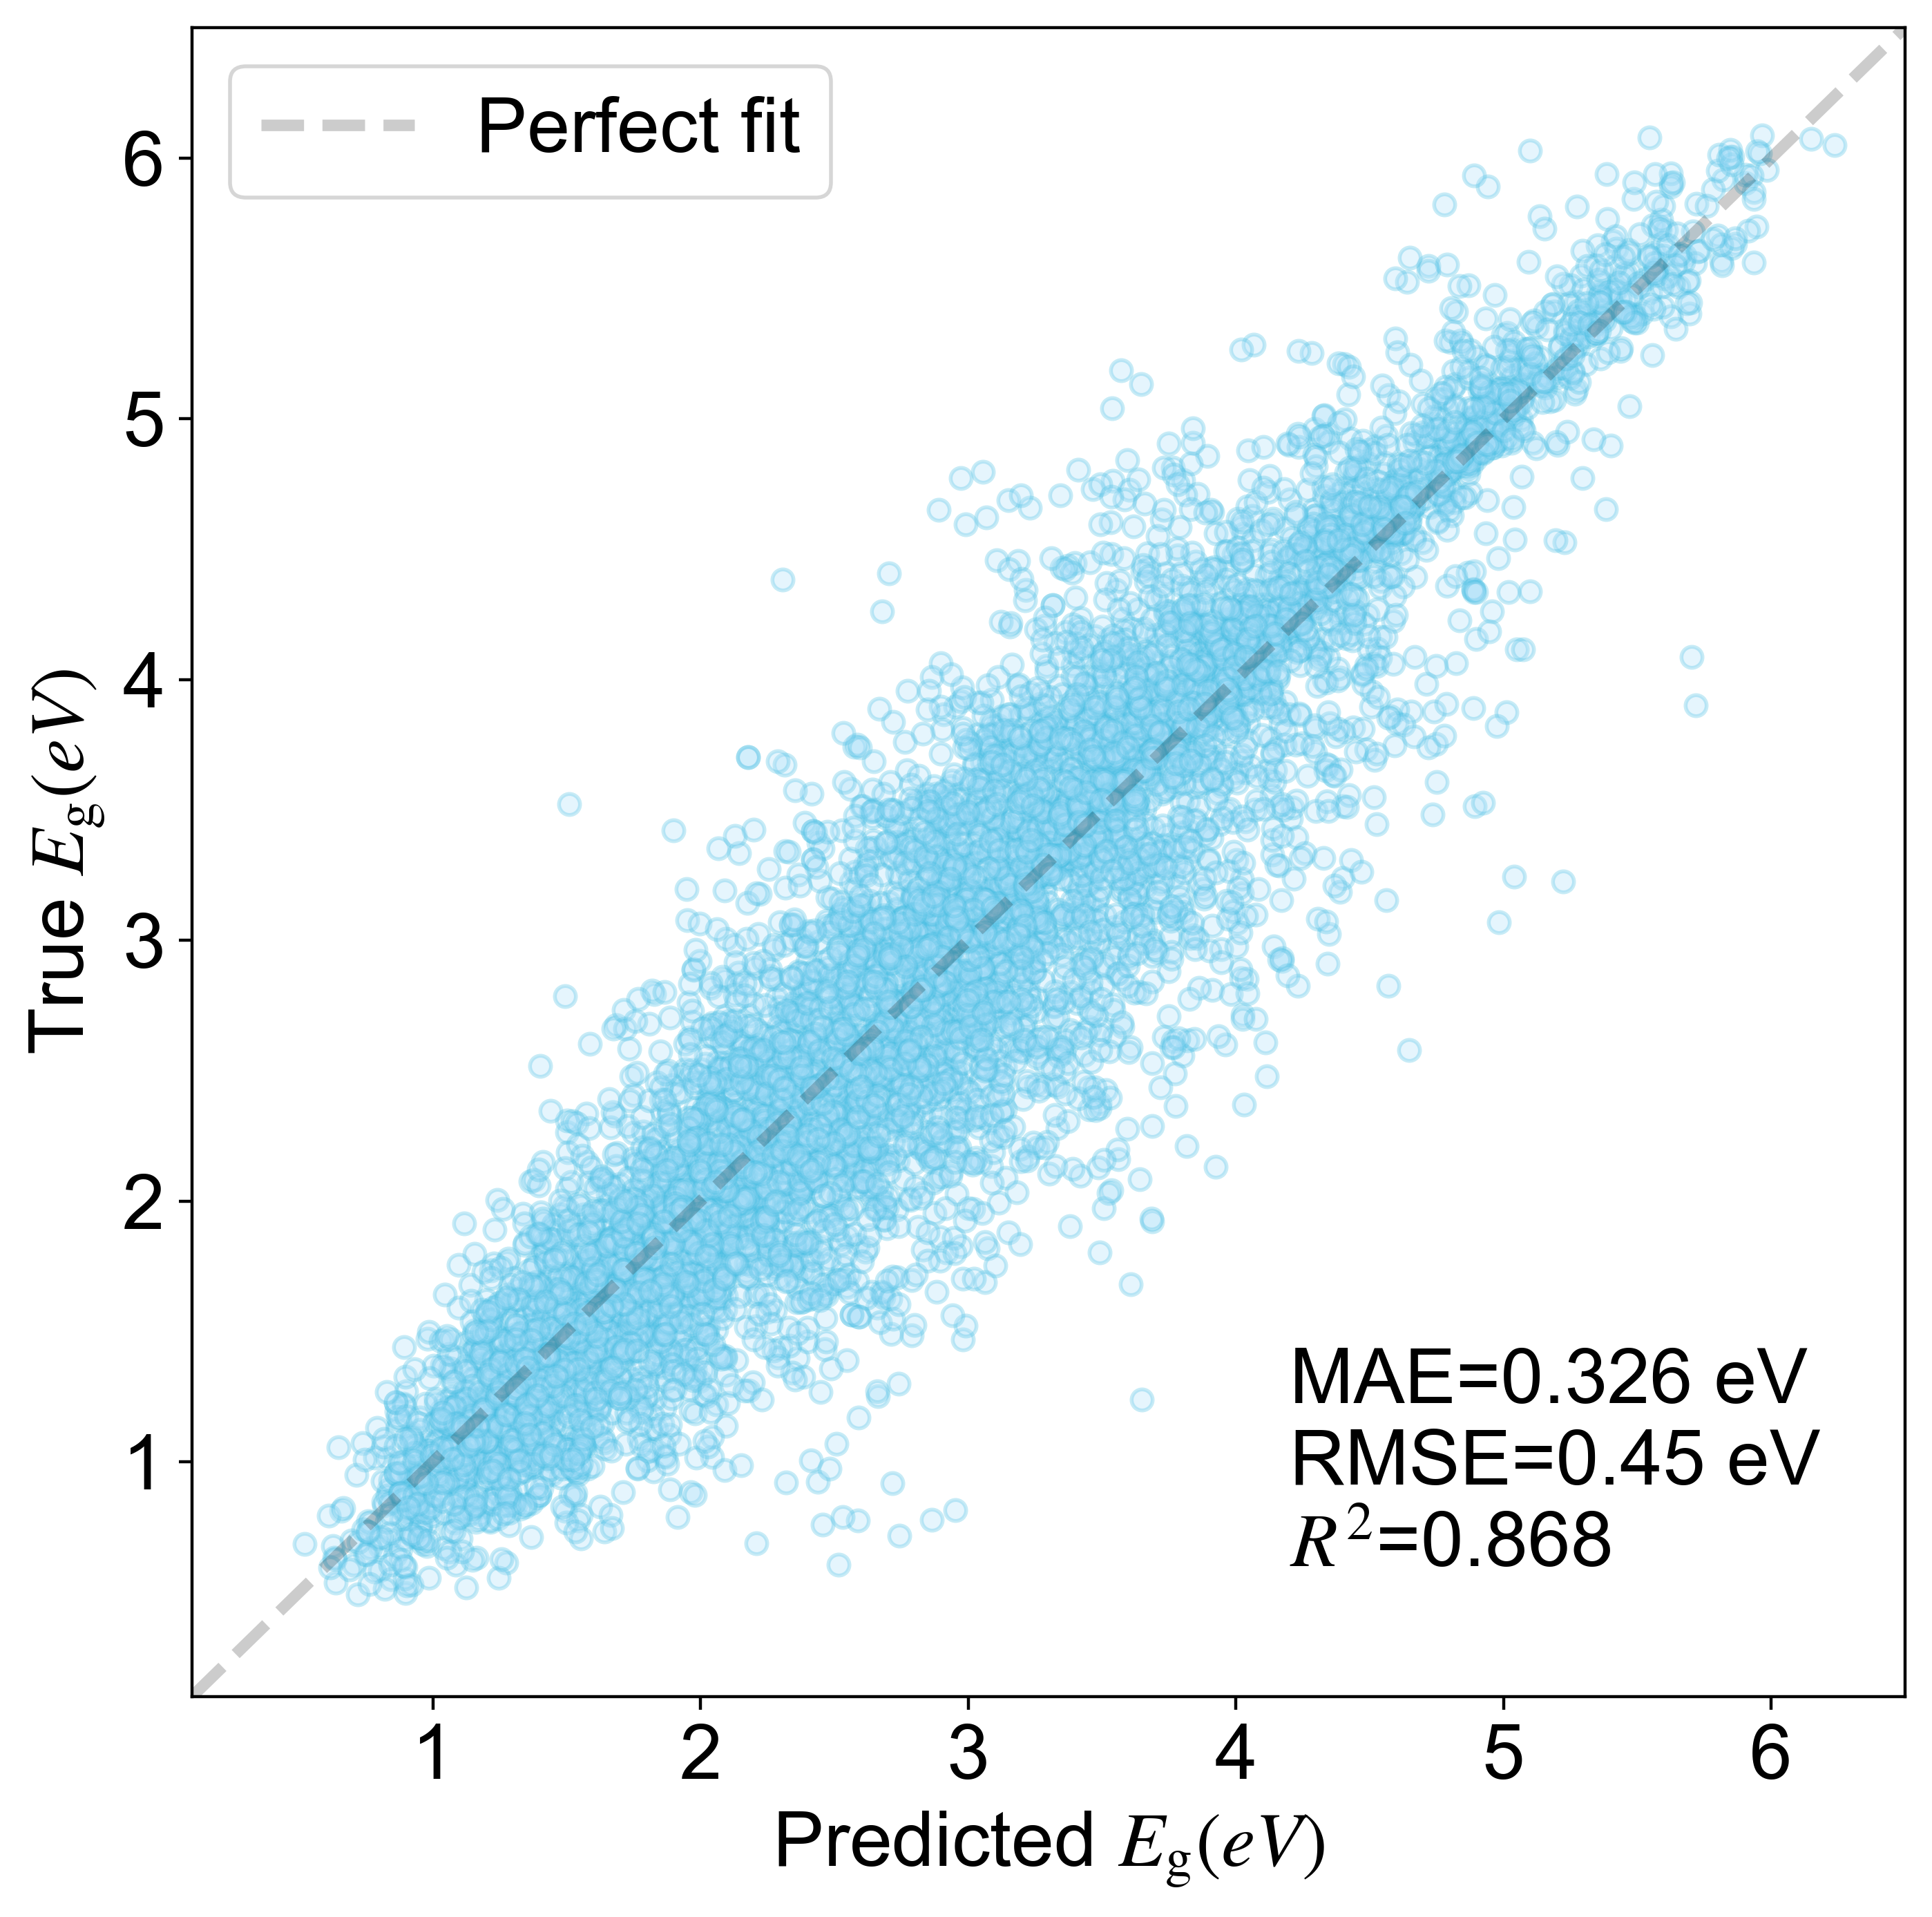

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig,ax = plt.subplots(figsize=(8,8),facecolor="w")


ax.scatter(y_pred,y_test,alpha = 0.3,s = 30, facecolor='#a9def9',edgecolor = '#48bfe3',linewidth = 1)


plt.xlim(0.1,6.5)
plt.ylim(0.1,6.5)
ax.plot([0.1, 6.5], [0.1, 6.5], linestyle='--', color='black',alpha = 0.2,lw=3,label='Perfect fit')

ax.legend(fontsize = 20)

model_result = "MAE=0.326 eV\nRMSE=0.45 eV\n$ R^{\mathrm{2}}$=0.868"
ax.text(4.2,0.6,model_result,fontsize=20,bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

ax.set_xlabel('Predicted '+r'$E_{\mathrm{g}}(eV)$',fontsize=20)
ax.set_ylabel('True '+ r'$E_{\mathrm{g}} (eV)$',fontsize=20)

# Set aspect of the main Axes.


# create new Axes on the right and on the top of the current Axes
# divider = make_axes_locatable(ax)
# # below height and pad are in inches
# ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
# ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)


# # make some labels invisible
# ax_histx.xaxis.set_tick_params(labelbottom=False)
# ax_histy.yaxis.set_tick_params(labelleft=False)

binwidth = 0.25
xymax = max(np.max(np.abs(y_pred)), np.max(np.abs(y_test)))
lim = (int(xymax/binwidth) + 1)*binwidth

# bins = np.arange(0, lim + binwidth, binwidth)
# ax_histx.hist(y_pred, bins=bins,color='#4895ef')
# ax_histy.hist(y_test, bins=bins, orientation='horizontal',color='#4895ef')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
   

plt.savefig('magpie.png',dpi=400, bbox_inches='tight')
# plt.show()

In [48]:
X_base = small_dataset_features[optimize_feature_labels]
y_base = small_dataset_features['target']
y_base_test = dop_magpie_etr.predict(X_base)
print('Performance on the valide set: MAE = %0.4f' % mean_absolute_error(y_base_test,y_base))
print('Performance on the valide set: RMSE = %0.4f' % np.sqrt(mean_squared_error(y_base_test, y_base)))
print('Performance on the valide set: R2 SCORE = %0.4f' % r2_score(y_base_test, y_base))

Performance on the valide set: MAE = 0.4790
Performance on the valide set: RMSE = 0.6349
Performance on the valide set: R2 SCORE = 0.5695


In [49]:
error_data = pd.DataFrame(columns = ['formula','valid_Eg','pred_Eg'])
error_data['formula'] = small_dataset_features['formula']
error_data['valid_Eg'] = small_dataset_features['target']
error_data['pred_Eg'] = y_base_test                            
error_data['diff'] = abs(error_data['valid_Eg'] - error_data['pred_Eg'])
error_data = error_data.sort_values(by='diff', ascending=False).reset_index(drop = True)
error_data

,formula,valid_Eg,pred_Eg,diff
0,BaCeO3,3.941353,1.963067,1.978286
1,HfBeO3,2.544336,4.246276,1.701940
2,InBiO3,1.050888,2.229868,1.178980
3,NdInO3,2.999078,4.035427,1.036349
4,GaBiO3,2.249296,3.256934,1.007639
5,PmErO3,3.361074,4.292482,0.931408
6,PmInO3,3.056738,3.947299,0.890561
7,NaNbO3,2.833721,1.949951,0.883770
8,DyInO3,2.996601,3.864773,0.868171
9,RbNbO3,2.697864,1.887364,0.810501


In [50]:
# error_data.to_csv('magpie_errror.csv')

In [35]:
train_data = X[optimize_feature_labels]
predict_y = dop_magpie_etr.predict(train_data)

In [36]:
large_error_data = pd.DataFrame(columns = ['valid_Eg','pred_Eg'])
large_error_data['valid_Eg'] = y
large_error_data['pred_Eg'] = predict_y
large_error_data['diff'] = abs(large_error_data['valid_Eg'] - large_error_data['pred_Eg'])
large_error_data = large_error_data.sort_values(by='diff', ascending=False).reset_index(drop = True)
large_error_data

,valid_Eg,pred_Eg,diff
0,0.859777,4.263581,3.403805
1,1.080163,3.301543,2.221380
2,5.692097,3.515075,2.177023
3,0.792813,2.905112,2.112299
4,2.079125,4.173572,2.094447
...,...,...,...
35320,3.027722,3.027722,0.000000
35321,2.176874,2.176874,0.000000
35322,3.110381,3.110381,0.000000
35323,2.132830,2.132830,0.000000


In [37]:
# large_error_data.to_csv('large_magpie_error.csv')

In [56]:
oe = abs(y_base_test-y_base).tolist()
oe = pd.DataFrame(oe,columns=['small_1'])
oe.to_csv('magpie_small_1.csv')

In [58]:
sum(oe['small_1'])/52

0.4790419563539209